In [104]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor
from sklearn.ensemble import VotingRegressor
from sklearn.ensemble import StackingRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression, SGDRegressor, Lasso, Ridge
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.ensemble import RandomForestRegressor


In [105]:
df=pd.read_csv('pre-owned cars.csv')

In [106]:
df.head()

,brand,model,transmission,make_year,reg_year,fuel_type,engine_capacity(CC),km_driven,ownership,price,overall_cost,has_insurance,spare_key,reg_number,title
0,Mahindra,Thar LX D 4WD MT CONVERTIBLE,Manual,2020.0,01-01-2021,Diesel,2184.0,11003.0,1st owner,1231000,23431.0,True,No,HR26,2020 Mahindra Thar LX D 4WD MT CONVERTIBLE
1,Hyundai,Verna 1.6 VTVT SX,Manual,2018.0,01-07-2018,Petrol,1591.0,66936.0,1st owner,786000,15359.0,True,No,DL7C,2018 Hyundai Verna 1.6 VTVT SX
2,Tata,Harrier XT PLUS 2.0L KRYOTEC DARK EDITON,Manual,2022.0,01-08-2022,Diesel,1956.0,27990.0,1st owner,1489000,28349.0,True,No,HR29,2022 Tata Harrier XT PLUS 2.0L KRYOTEC DARK ED...
3,Honda,City 1.5L I-VTE V CVT,Automatic,2023.0,01-04-2023,Petrol,1498.0,5061.0,1st owner,1227000,23355.0,True,Yes,DL4C,2023 Honda City 1.5L I-VTE V CVT
4,Ford,Ecosport TITANIUM 1.5L DIESEL,Manual,2021.0,01-07-2021,Diesel,1498.0,23480.0,1st owner,887000,16883.0,True,No,UP14,2021 Ford Ecosport TITANIUM 1.5L DIESEL


In [107]:
df.isnull().sum()

brand                     1
model                     1
transmission              1
make_year                 1
reg_year               2086
fuel_type                 1
engine_capacity(CC)     118
km_driven                 1
ownership                 1
price                     0
overall_cost              1
has_insurance             1
spare_key                 1
reg_number                1
title                     1
dtype: int64

In [108]:
df = df.drop(columns=['reg_year'])


In [109]:
print(df.isnull().sum())


brand                    1
model                    1
transmission             1
make_year                1
fuel_type                1
engine_capacity(CC)    118
km_driven                1
ownership                1
price                    0
overall_cost             1
has_insurance            1
spare_key                1
reg_number               1
title                    1
dtype: int64


In [110]:
for col in ['engine_capacity(CC)', 'make_year', 'km_driven', 'overall_cost']:
    median_val = df[col].median()
    df[col].fillna(median_val, inplace=True)


C:\Users\amira\AppData\Local\Temp\ipykernel_19900\4266738699.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(median_val, inplace=True)
C:\Users\amira\AppData\Local\Temp\ipykernel_19900\4266738699.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, wh

In [111]:
df['model'].fillna('Unknown', inplace=True) 


C:\Users\amira\AppData\Local\Temp\ipykernel_19900\2491878949.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['model'].fillna('Unknown', inplace=True)


In [112]:
df.head()

,brand,model,transmission,make_year,fuel_type,engine_capacity(CC),km_driven,ownership,price,overall_cost,has_insurance,spare_key,reg_number,title
0,Mahindra,Thar LX D 4WD MT CONVERTIBLE,Manual,2020.0,Diesel,2184.0,11003.0,1st owner,1231000,23431.0,True,No,HR26,2020 Mahindra Thar LX D 4WD MT CONVERTIBLE
1,Hyundai,Verna 1.6 VTVT SX,Manual,2018.0,Petrol,1591.0,66936.0,1st owner,786000,15359.0,True,No,DL7C,2018 Hyundai Verna 1.6 VTVT SX
2,Tata,Harrier XT PLUS 2.0L KRYOTEC DARK EDITON,Manual,2022.0,Diesel,1956.0,27990.0,1st owner,1489000,28349.0,True,No,HR29,2022 Tata Harrier XT PLUS 2.0L KRYOTEC DARK ED...
3,Honda,City 1.5L I-VTE V CVT,Automatic,2023.0,Petrol,1498.0,5061.0,1st owner,1227000,23355.0,True,Yes,DL4C,2023 Honda City 1.5L I-VTE V CVT
4,Ford,Ecosport TITANIUM 1.5L DIESEL,Manual,2021.0,Diesel,1498.0,23480.0,1st owner,887000,16883.0,True,No,UP14,2021 Ford Ecosport TITANIUM 1.5L DIESEL


In [113]:
df = df.drop('reg_number', axis=1)


In [114]:
df['brand'].value_counts()


brand
Maruti        925
Hyundai       660
Honda         276
Tata          240
Renault       167
KIA           116
Mahindra      114
Ford           64
Volkswagen     53
Nissan         38
MG             37
Toyota         36
Datsun         34
Skoda          33
Jeep           12
Name: count, dtype: int64

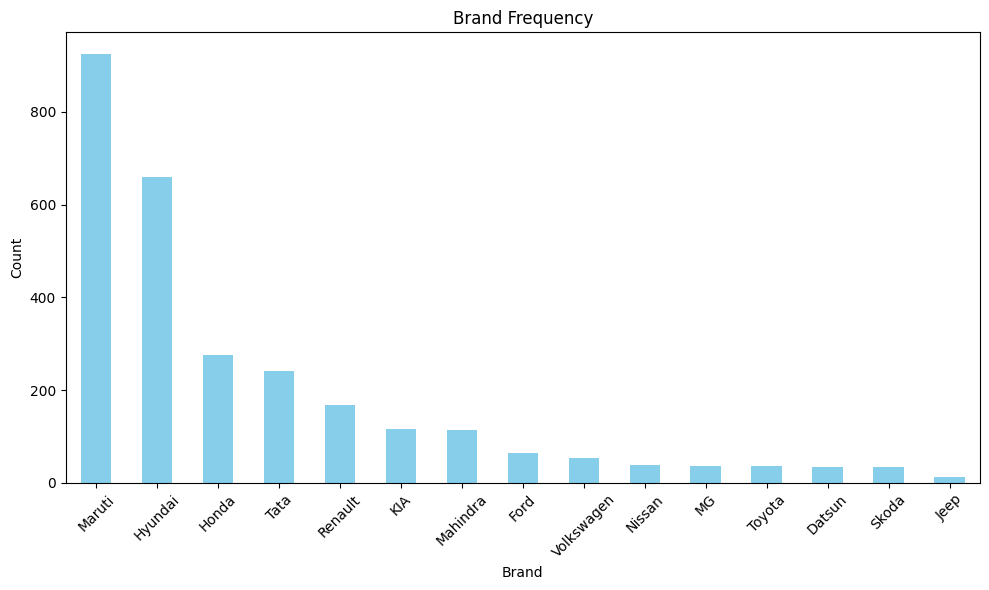

In [115]:
df['brand'].value_counts().plot(kind='bar', figsize=(10,6), color='skyblue')
plt.title('Brand Frequency')
plt.xlabel('Brand')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


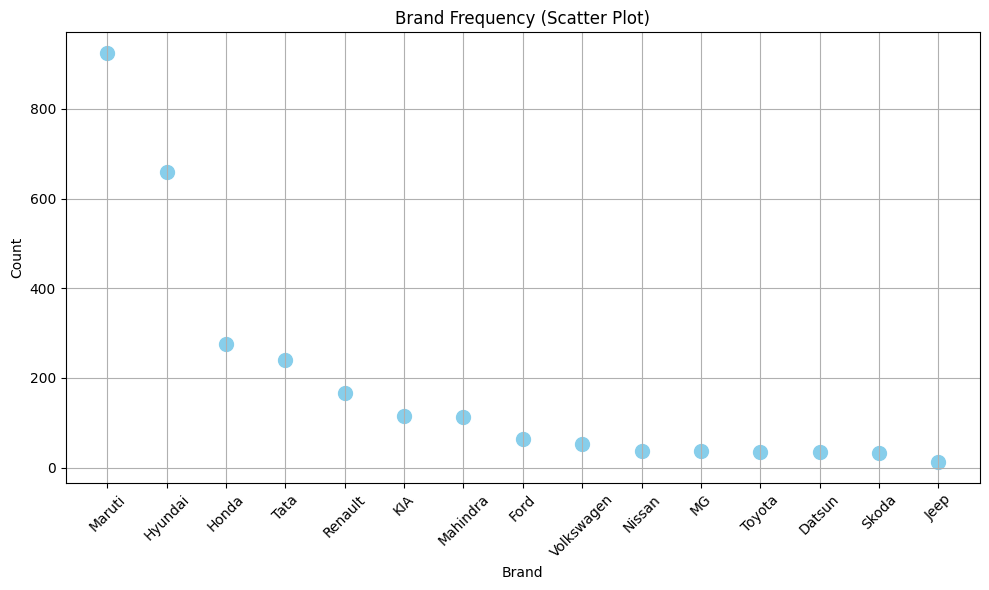

In [116]:
plt.figure(figsize=(10,6))
plt.scatter(df['brand'].value_counts().index, df['brand'].value_counts().values, color='skyblue', s=100)
plt.title('Brand Frequency (Scatter Plot)')
plt.xlabel('Brand')  
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

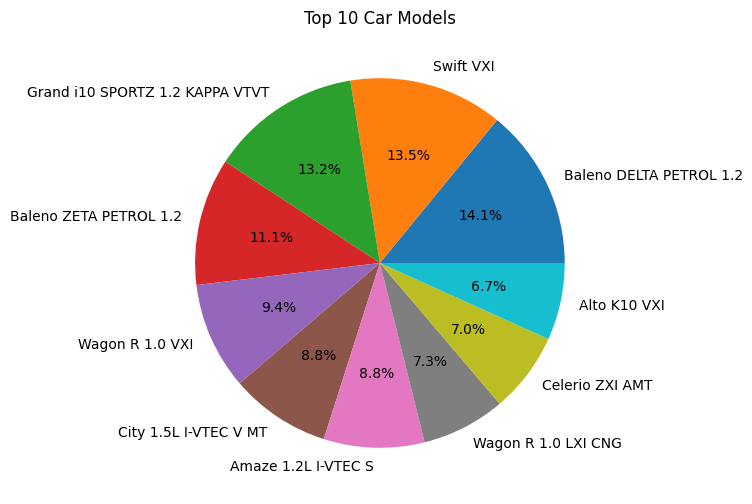

In [117]:
top_models = df['model'].value_counts().head(10)
top_models.plot(kind='pie', autopct='%1.1f%%', figsize=(6,6))
plt.title('Top 10 Car Models')
plt.ylabel('')
plt.show()

In [118]:
df['transmission'].value_counts()


transmission
Manual       1925
Automatic     880
Name: count, dtype: int64

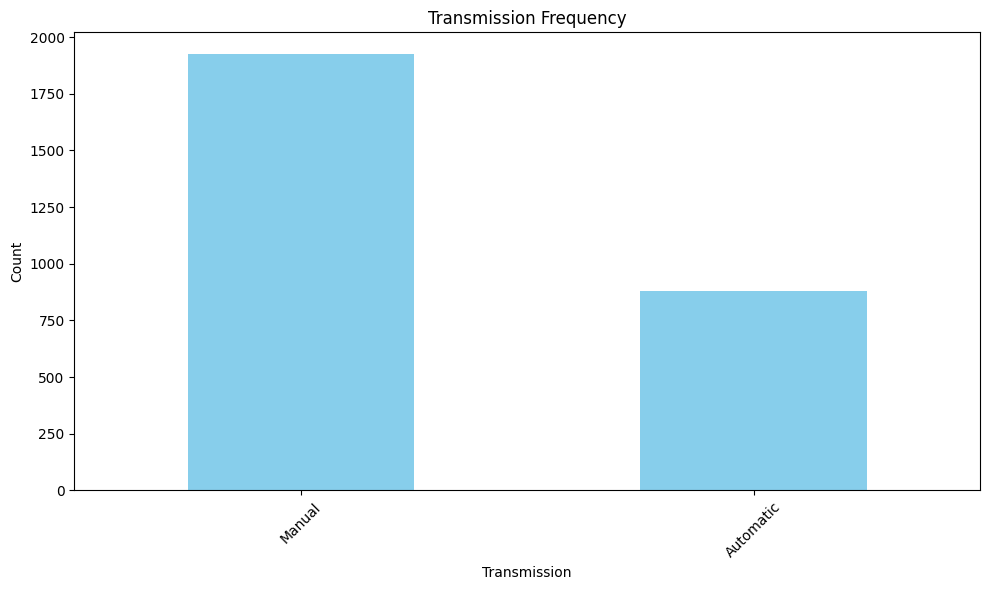

In [119]:
df['transmission'].value_counts().plot(kind='bar', figsize=(10,6), color='skyblue')
plt.title('Transmission Frequency')
plt.xlabel('Transmission')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


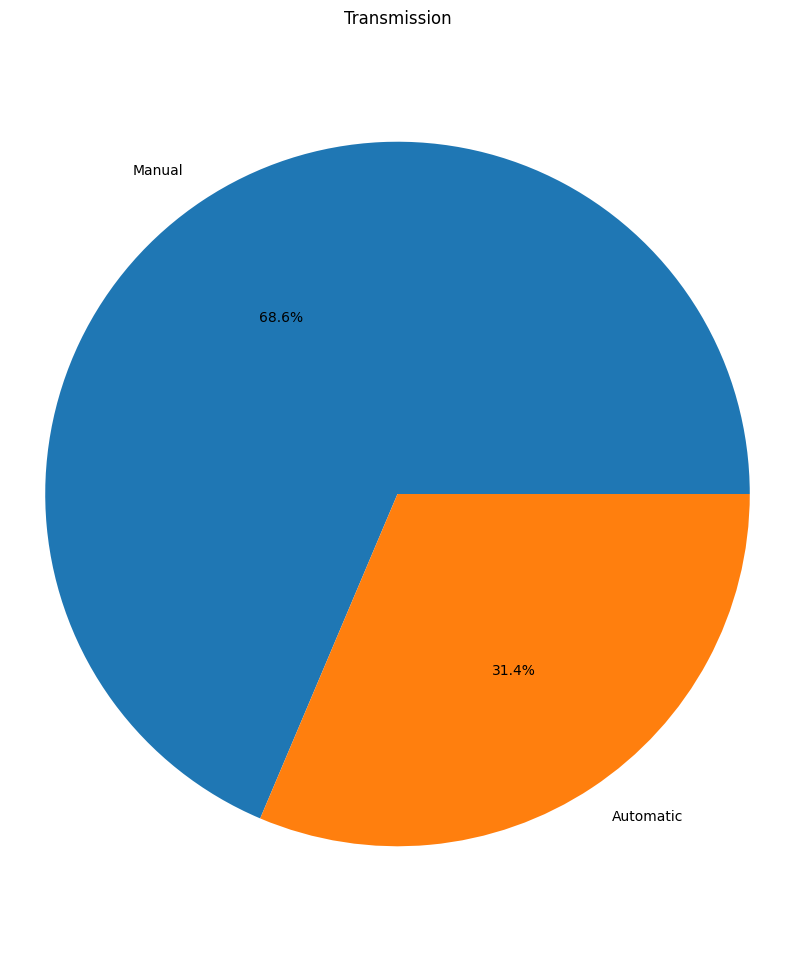

In [120]:

plt.figure(figsize=(10, 12))
plt.pie(df['transmission'].value_counts(), labels=df['transmission'].value_counts().index, autopct='%1.1f%%')
plt.title('Transmission')
plt.axis('equal')
plt.show()


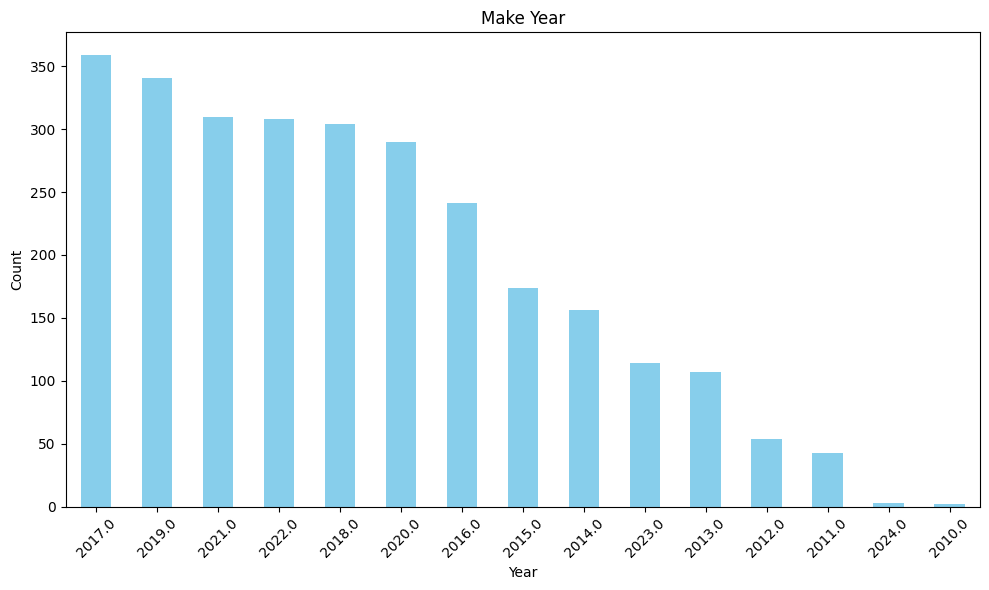

In [121]:
df['make_year'].value_counts().plot(kind='bar', figsize=(10,6), color='skyblue')
plt.title('Make Year')
plt.xlabel('Year')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [122]:
df['make_year'].mean()

np.float64(2018.1810406272273)

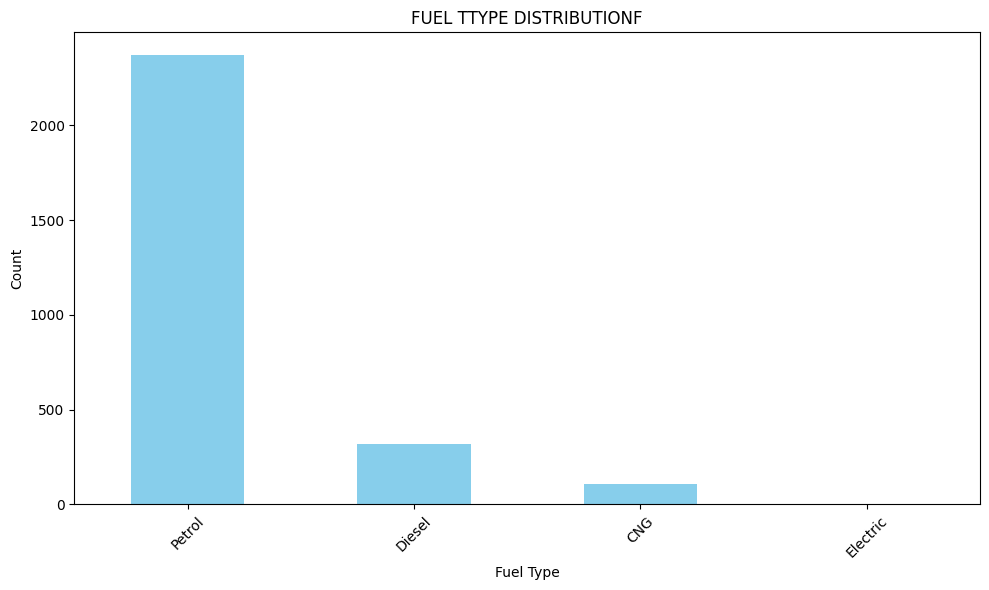

In [123]:
df['fuel_type'].value_counts().plot(kind='bar', figsize=(10,6), color='skyblue')
plt.title('FUEL TTYPE DISTRIBUTIONF')
plt.xlabel('Fuel Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

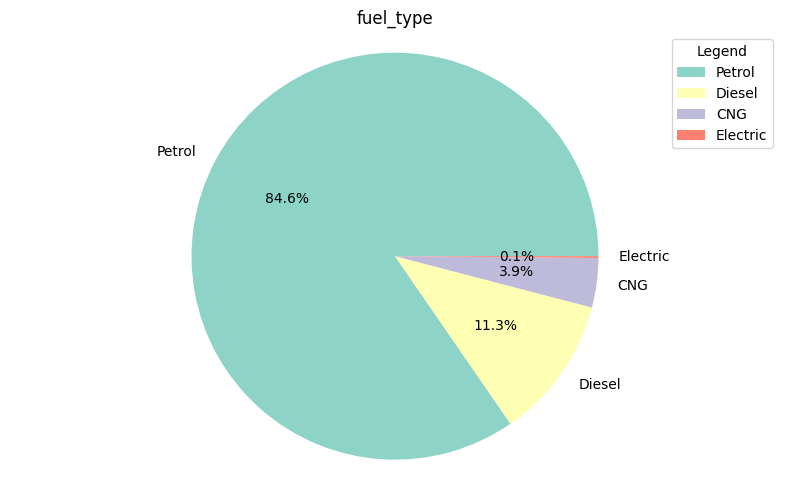

In [124]:
plt.figure(figsize=(8, 5))
df['fuel_type'].value_counts().plot(kind='pie', autopct='%1.1f%%',colors=plt.cm.Set3.colors)
plt.title('fuel_type')
plt.ylabel('')
plt.legend(loc='upper right', title="Legend")
plt.axis('equal')
plt.tight_layout()
plt.show()

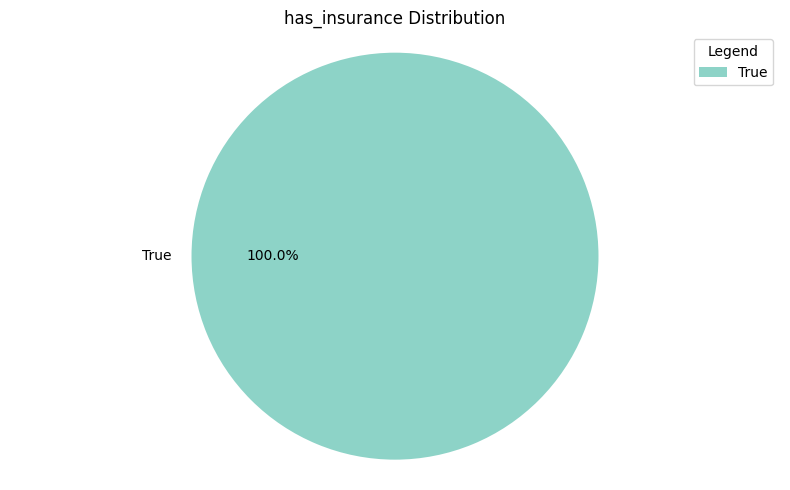

In [125]:
plt.figure(figsize=(8, 5))
df['has_insurance'].value_counts().plot(kind='pie', autopct='%1.1f%%',colors=plt.cm.Set3.colors)
plt.title('has_insurance Distribution')
plt.ylabel('')
plt.legend(loc='upper right', title="Legend")
plt.axis('equal')
plt.tight_layout()
plt.show()

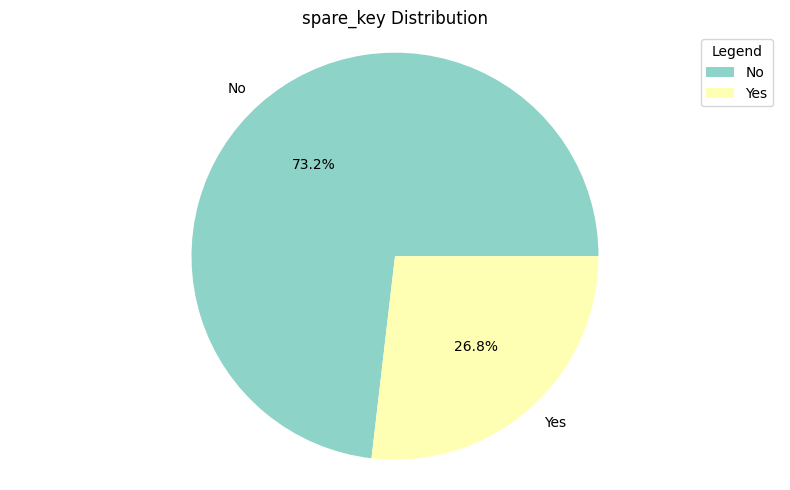

In [126]:
plt.figure(figsize=(8, 5))
df['spare_key'].value_counts().plot(kind='pie', autopct='%1.1f%%',colors=plt.cm.Set3.colors)
plt.title('spare_key Distribution')
plt.ylabel('')
plt.legend(loc='upper right', title="Legend")
plt.axis('equal')
plt.tight_layout()
plt.show()

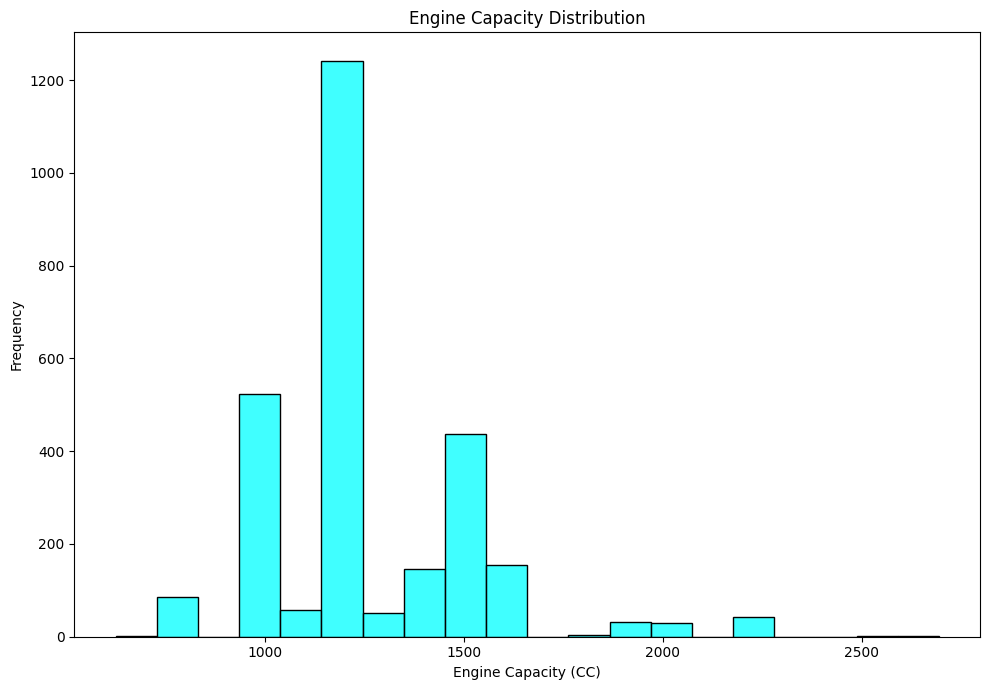

In [127]:
plt.figure(figsize=(10, 7))
sns.histplot(df['engine_capacity(CC)'], bins=20, color='cyan', edgecolor='black')
plt.title('Engine Capacity Distribution')
plt.xlabel('Engine Capacity (CC)')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()


In [128]:
df.head()

,brand,model,transmission,make_year,fuel_type,engine_capacity(CC),km_driven,ownership,price,overall_cost,has_insurance,spare_key,title
0,Mahindra,Thar LX D 4WD MT CONVERTIBLE,Manual,2020.0,Diesel,2184.0,11003.0,1st owner,1231000,23431.0,True,No,2020 Mahindra Thar LX D 4WD MT CONVERTIBLE
1,Hyundai,Verna 1.6 VTVT SX,Manual,2018.0,Petrol,1591.0,66936.0,1st owner,786000,15359.0,True,No,2018 Hyundai Verna 1.6 VTVT SX
2,Tata,Harrier XT PLUS 2.0L KRYOTEC DARK EDITON,Manual,2022.0,Diesel,1956.0,27990.0,1st owner,1489000,28349.0,True,No,2022 Tata Harrier XT PLUS 2.0L KRYOTEC DARK ED...
3,Honda,City 1.5L I-VTE V CVT,Automatic,2023.0,Petrol,1498.0,5061.0,1st owner,1227000,23355.0,True,Yes,2023 Honda City 1.5L I-VTE V CVT
4,Ford,Ecosport TITANIUM 1.5L DIESEL,Manual,2021.0,Diesel,1498.0,23480.0,1st owner,887000,16883.0,True,No,2021 Ford Ecosport TITANIUM 1.5L DIESEL


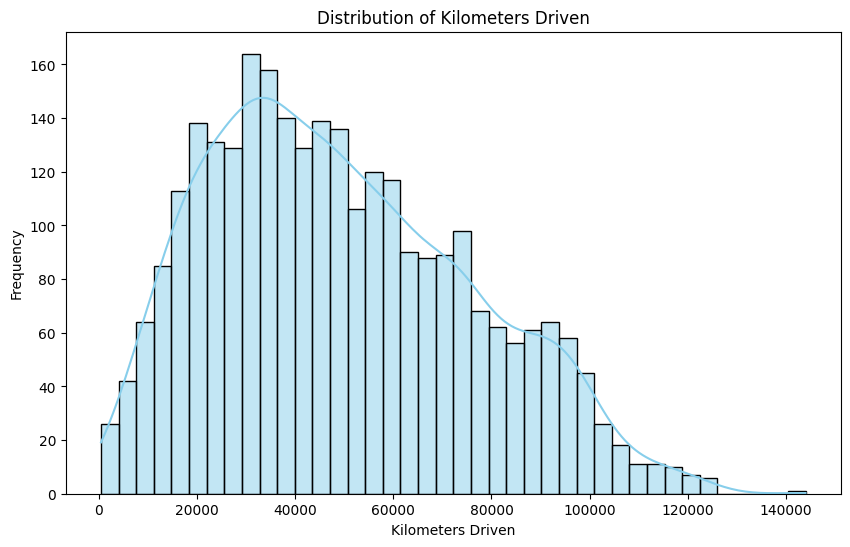

In [129]:
plt.figure(figsize=(10, 6))
sns.histplot(df['km_driven'], bins=40, kde=True, color='skyblue')
plt.title('Distribution of Kilometers Driven')
plt.xlabel('Kilometers Driven')
plt.ylabel('Frequency')
plt.show()

In [130]:
print(df['km_driven'].mean())

49214.22273699216


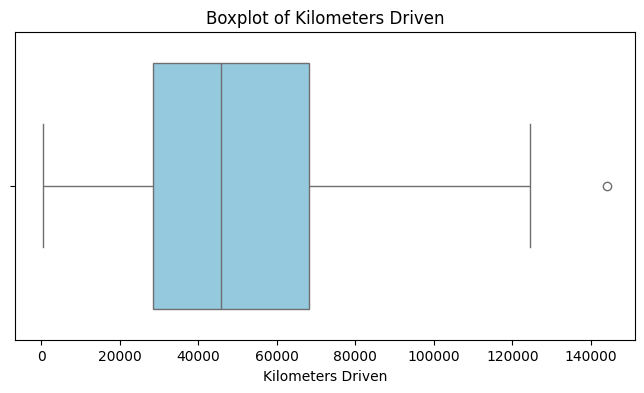

In [131]:
plt.figure(figsize=(8, 4))
sns.boxplot(x=df['km_driven'], color='skyblue')
plt.title('Boxplot of Kilometers Driven')
plt.xlabel('Kilometers Driven')
plt.show()

* Bivariate Analysis *

In [132]:
print(df['price'].describe())
print(df['price'].value_counts().head(10))  # Check how often 0 appears


count    2.806000e+03
mean     1.342522e+06
std      3.554669e+07
min      1.630000e+05
25%      4.350000e+05
50%      5.940000e+05
75%      8.140000e+05
max      1.883558e+09
Name: price, dtype: float64
price
483000    12
478000    10
504000     9
562000     9
428000     9
424000     9
574000     9
412000     9
416000     9
630000     9
Name: count, dtype: int64


In [133]:
df_filtered = df[df['price'] < 1e7]  # 10 million


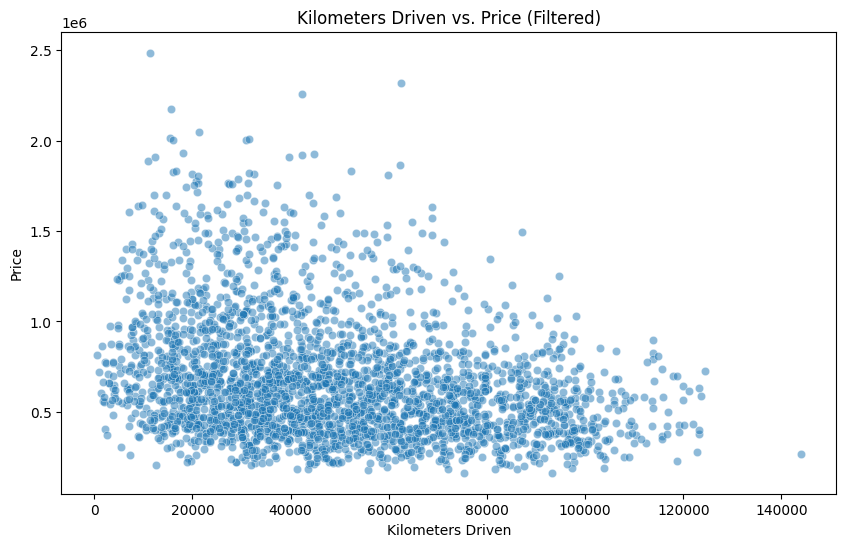

In [134]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_filtered, x='km_driven', y='price', alpha=0.5)
plt.title('Kilometers Driven vs. Price (Filtered)')
plt.xlabel('Kilometers Driven')
plt.ylabel('Price')
plt.show()


In [135]:
df_filtered = df[df['price'] < 1e7]  # Remove prices >= 10 million


In [136]:
df_filtered = df_filtered[df_filtered['engine_capacity(CC)'] < 6000]  # Reasonable upper limit


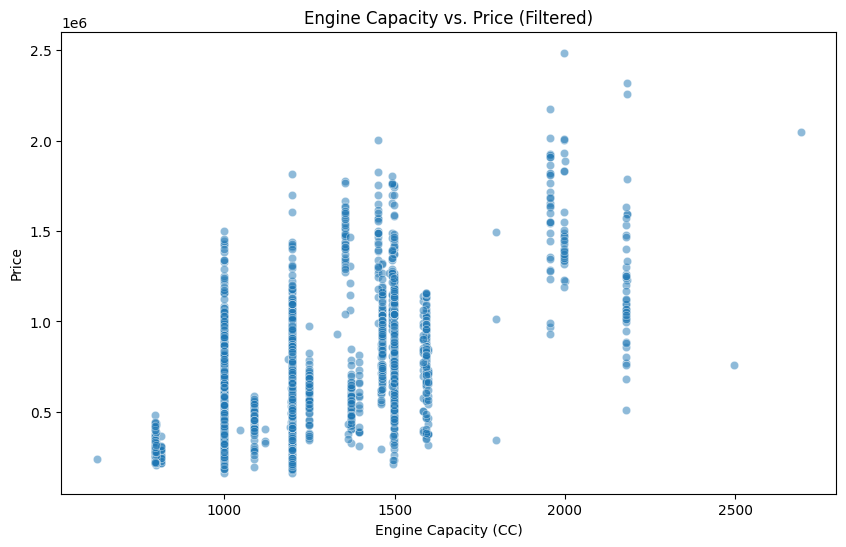

In [137]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='engine_capacity(CC)', y='price', data=df_filtered, alpha=0.5)
plt.title('Engine Capacity vs. Price (Filtered)')
plt.xlabel('Engine Capacity (CC)')
plt.ylabel('Price')
plt.show()


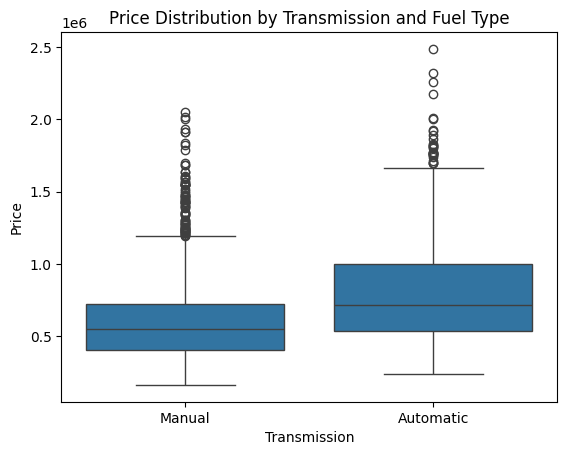

In [138]:
sns.boxplot(x='transmission', y='price', data=df)
plt.title('Price Distribution by Transmission and Fuel Type')
plt.xlabel('Transmission')
plt.ylabel('Price')
plt.show()


In [139]:
df_filtered = df[df['price'] < 1e7]  # Filter out prices >= 10 million


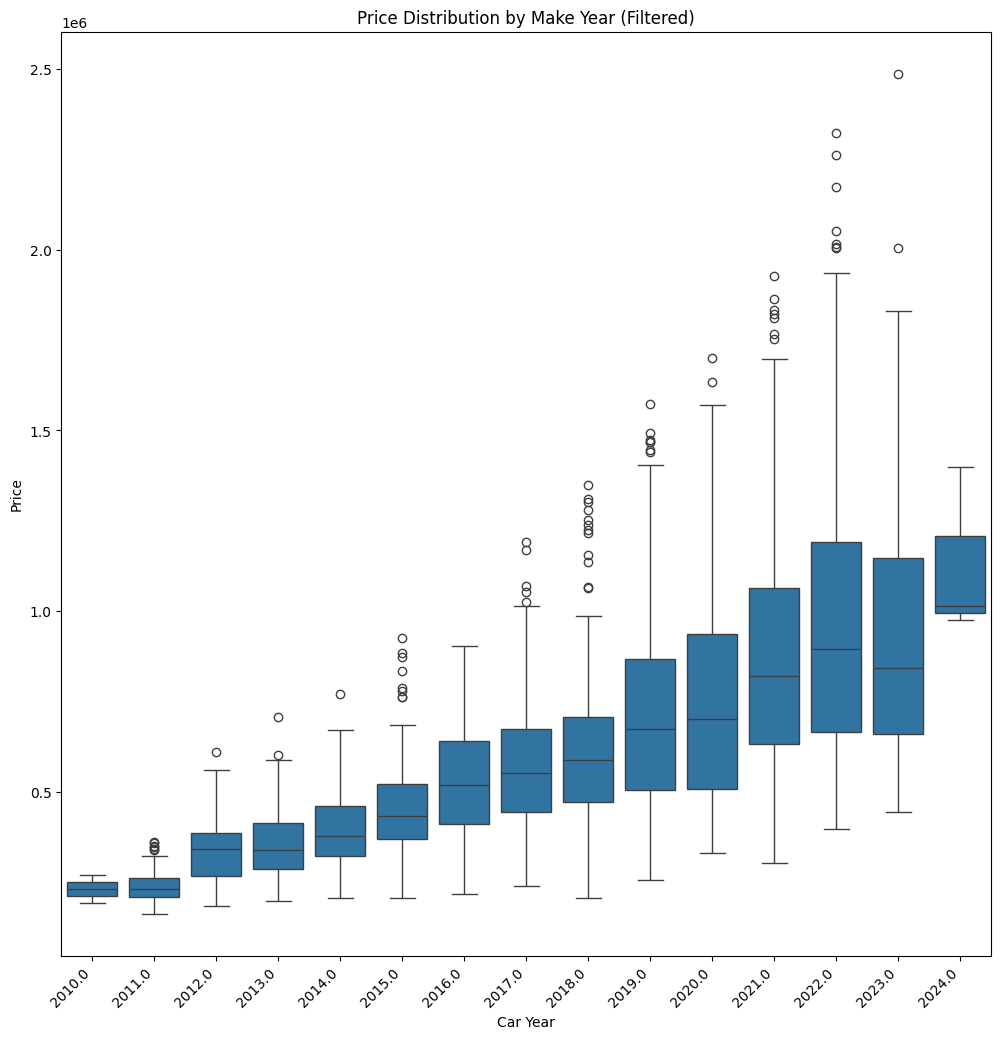

In [140]:
plt.figure(figsize=(12, 12))
sns.boxplot(x='make_year', y='price', data=df_filtered)
plt.title('Price Distribution by Make Year (Filtered)')
plt.xlabel('Car Year')
plt.ylabel('Price')
plt.xticks(rotation=45, ha='right')
plt.show()


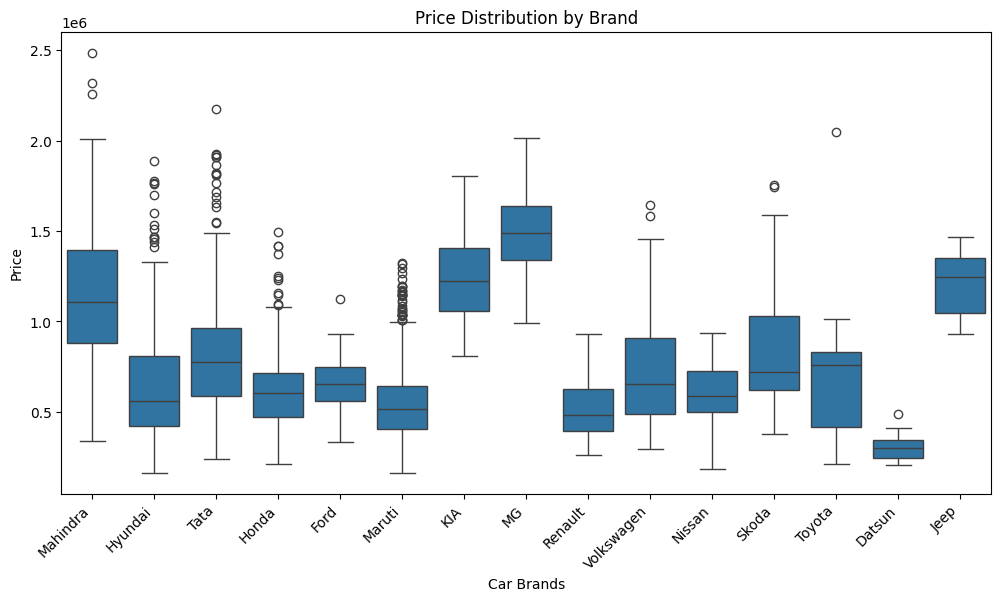

In [141]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='brand', y='price', data=df)
plt.title('Price Distribution by Brand')
plt.xlabel('Car Brands')
plt.ylabel('Price')
plt.xticks(rotation=45, ha='right')
plt.show()

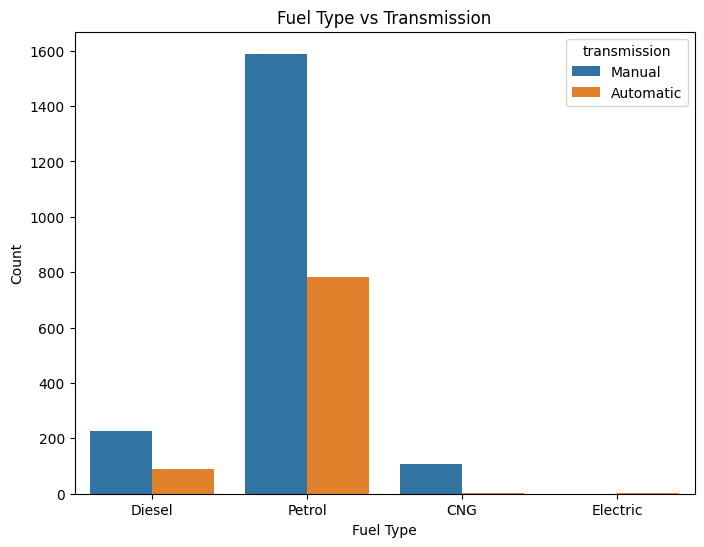

In [142]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='fuel_type', hue='transmission')
plt.title('Fuel Type vs Transmission')
plt.xlabel('Fuel Type')
plt.ylabel('Count')
plt.show()


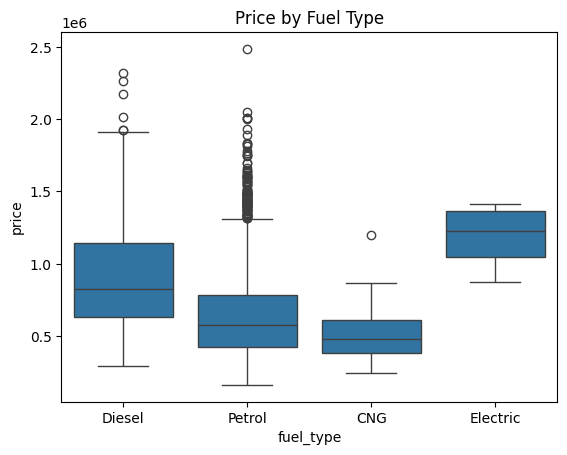

In [143]:
sns.boxplot(x='fuel_type', y='price', data=df)
plt.title('Price by Fuel Type')
plt.show()


In [144]:
# Remove extreme prices (e.g., above 10 million)
df_filtered = df[df['price'] < 1e7]


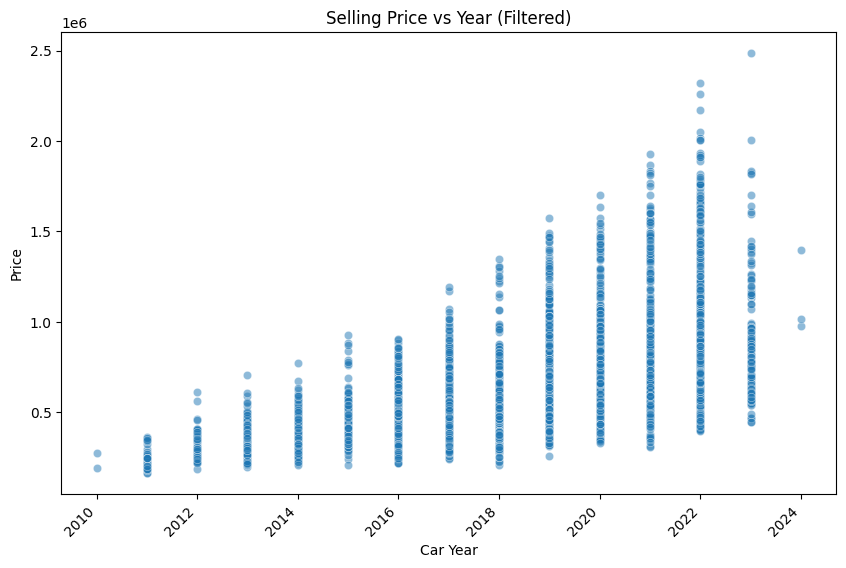

In [145]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='make_year', y='price', data=df_filtered, alpha=0.5)
plt.title('Selling Price vs Year (Filtered)')
plt.xlabel('Car Year')
plt.ylabel('Price')
plt.xticks(rotation=45, ha='right')
plt.show()


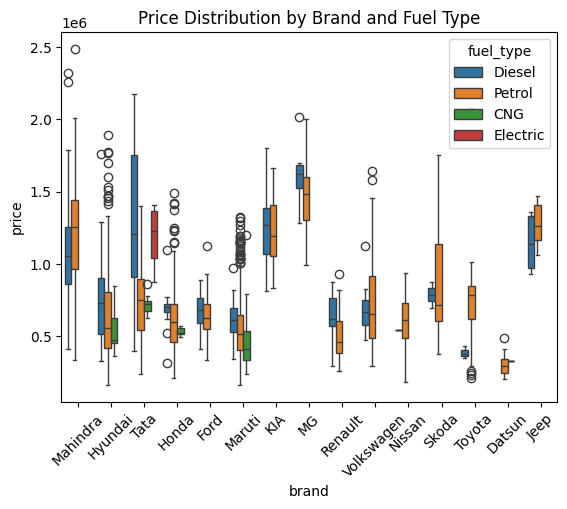

In [146]:
sns.boxplot(data=df, x='brand', y='price', hue='fuel_type')
plt.title('Price Distribution by Brand and Fuel Type')
plt.xticks(rotation=45)
plt.show()


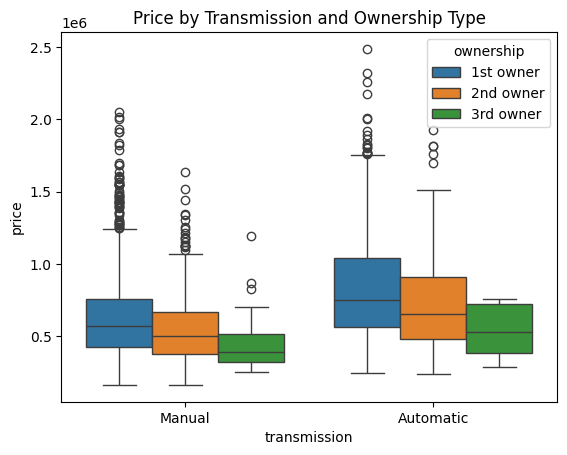

In [147]:
sns.boxplot(data=df, x='transmission', y='price', hue='ownership')
plt.title('Price by Transmission and Ownership Type')
plt.show()


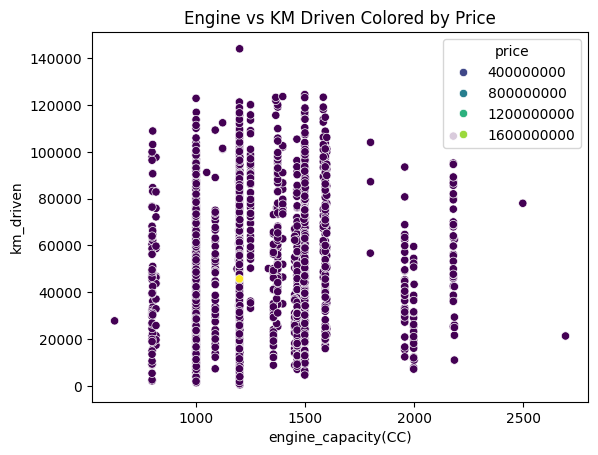

In [148]:
sns.scatterplot(data=df, x='engine_capacity(CC)', y='km_driven', hue='price', palette='viridis')
plt.title("Engine vs KM Driven Colored by Price")
plt.show()


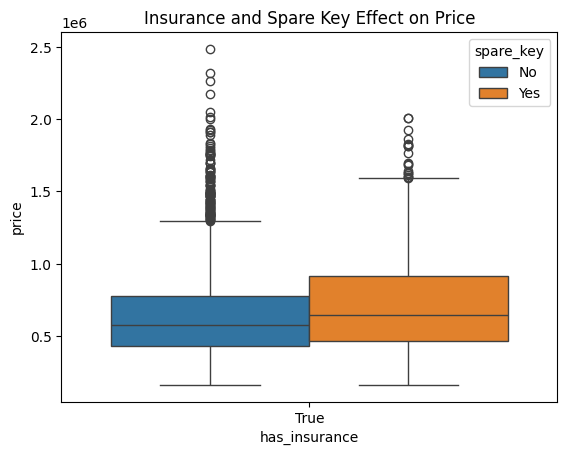

In [149]:
sns.boxplot(data=df, x='has_insurance', y='price', hue='spare_key')
plt.title('Insurance and Spare Key Effect on Price')
plt.show()


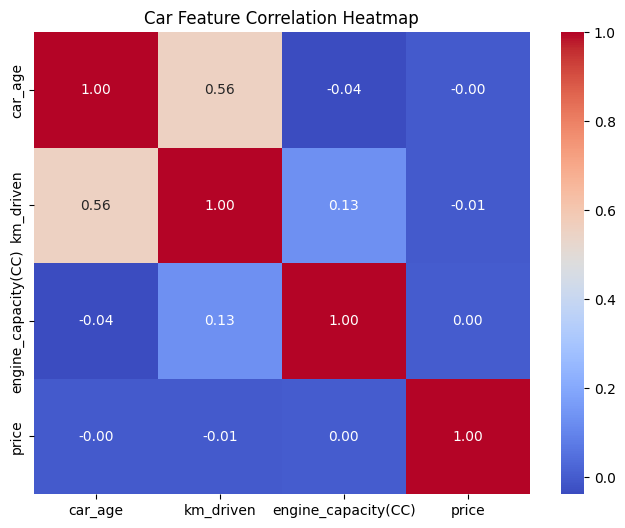

In [150]:
df['car_age'] = 2025 - df['make_year']

# Draw heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(df[['car_age', 'km_driven', 'engine_capacity(CC)', 'price']].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Car Feature Correlation Heatmap')
plt.show()

In [151]:
df.isnull().sum()


brand                  1
model                  0
transmission           1
make_year              0
fuel_type              1
engine_capacity(CC)    0
km_driven              0
ownership              1
price                  0
overall_cost           0
has_insurance          1
spare_key              1
title                  1
car_age                0
dtype: int64

In [152]:

df['brand'] = df['brand'].fillna(df['brand'].mode()[0])
df['transmission'] = df['transmission'].fillna(df['transmission'].mode()[0])
df['fuel_type'] = df['fuel_type'].fillna(df['fuel_type'].mode()[0])
df['ownership'] = df['ownership'].fillna(df['ownership'].mode()[0])
df['has_insurance'] = df['has_insurance'].fillna(df['has_insurance'].mode()[0])
df['spare_key'] = df['spare_key'].fillna(df['spare_key'].mode()[0])

df['title'] = df['title'].fillna('Unknown')


C:\Users\amira\AppData\Local\Temp\ipykernel_19900\3210590844.py:5: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['has_insurance'] = df['has_insurance'].fillna(df['has_insurance'].mode()[0])


In [153]:
encoder = LabelEncoder()
df['has_insurance'] = encoder.fit_transform(df['has_insurance'])
df['spare_key'] = encoder.fit_transform(df['spare_key'])
df['model'] = encoder.fit_transform(df['model'])

In [154]:
df = pd.get_dummies(df, columns=['brand', 'transmission', 'fuel_type', 'ownership', 'title'], drop_first=True)


In [155]:
df.head()


,model,make_year,engine_capacity(CC),km_driven,price,overall_cost,has_insurance,spare_key,car_age,brand_Ford,...,title_2023 Tata Tiago XE PETROL,title_2023 Tata Tiago XT (O) PETROL,title_2023 Tata Tiago XZA PLUS PETROL,title_2023 Toyota Glanza V AMT,title_2023 Volkswagen VIRTUS GT PLUS TSI 1.5 EVO DSG,title_2023 Volkswagen VIRTUS HIGHLINE TSI 1.0 AT,title_2024 Hyundai NEW I20 Sportz (O) 1.2 IVT,title_2024 Tata NEXON FEARLESS + SUNROOF DCA DUAL TONE 1.2 PETROL,title_2024 Toyota Glanza V AMT,title_Unknown
0,656,2020.0,2184.0,11003.0,1231000,23431.0,0,0,5.0,False,...,False,False,False,False,False,False,False,False,False,False
1,706,2018.0,1591.0,66936.0,786000,15359.0,0,0,7.0,False,...,False,False,False,False,False,False,False,False,False,False
2,324,2022.0,1956.0,27990.0,1489000,28349.0,0,0,3.0,False,...,False,False,False,False,False,False,False,False,False,False
3,131,2023.0,1498.0,5061.0,1227000,23355.0,0,1,2.0,False,...,False,False,False,False,False,False,False,False,False,False
4,212,2021.0,1498.0,23480.0,887000,16883.0,0,0,4.0,True,...,False,False,False,False,False,False,False,False,False,False


In [156]:
numeric_cols = ['km_driven', 'engine_capacity(CC)', 'car_age', 'overall_cost']

scaler = MinMaxScaler()
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

In [157]:
X = df.drop('price', axis=1)  
y = df['price']          

In [158]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [159]:
model = LinearRegression()
model.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [160]:
y_pred = model.predict(X_test)

In [161]:
model.score(X_train, y_train)

0.9999999074223448

In [162]:
linear_error=print(mean_absolute_error(y_test, y_pred))

1021835.8032053043


In [163]:
sgd = SGDRegressor()

sgd.fit(X_train, y_train)

,loss,'squared_error'
,penalty,'l2'
,alpha,0.0001
,l1_ratio,0.15
,fit_intercept,True
,max_iter,1000
,tol,0.001
,shuffle,True
,verbose,0
,epsilon,0.1
,random_state,None


In [164]:
sgd.score(X_train,y_train)

-1117026266118473.6

In [165]:
y_pred = sgd.predict(X_test)
sgd_error=print(mean_absolute_error(y_test, y_pred))

1236398761425508.2


In [166]:
lasso = Lasso()

lasso.fit(X_train, y_train)

,alpha,1.0
,fit_intercept,True
,precompute,False
,copy_X,True
,max_iter,1000
,tol,0.0001
,warm_start,False
,positive,False
,random_state,None
,selection,'cyclic'


In [167]:
lasso.score(X_train,y_train)

0.9999969546395419

In [168]:
y_pred = lasso.predict(X_test)
lasso_error=print(mean_absolute_error(y_test, y_pred))

700696.9251294025


In [169]:
ridge = Ridge()

ridge.fit(X_train, y_train)

,alpha,1.0
,fit_intercept,True
,copy_X,True
,max_iter,None
,tol,0.0001
,solver,'auto'
,positive,False
,random_state,None


In [170]:
ridge.score(X_train,y_train)

0.7512565667235842

In [171]:
y_pred = ridge.predict(X_test)
ridge_score=print(mean_absolute_error(y_test, y_pred))

1522282.7967127217


## SVM ##

In [172]:
svr_model = SVR(kernel='rbf') 
svr_model.fit(X_train, y_train)

,kernel,'rbf'
,degree,3
,gamma,'scale'
,coef0,0.0
,tol,0.001
,C,1.0
,epsilon,0.1
,shrinking,True
,cache_size,200
,verbose,False
,max_iter,-1


In [173]:
svr_model.score(X_train,y_train)

-0.000533259793477292

In [174]:
y_pred = svr_model.predict(X_test)
svr_error=print(mean_absolute_error(y_test, y_pred))


235861.19426946665


## KNN ##

In [175]:
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train, y_train)

,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [176]:
y_pred_knn = knn.predict(X_test)
knn_error=print(mean_absolute_error(y_test, y_pred))

235861.19426946665


In [177]:
knn.score(X_train, y_train)

0.27992750900830776

## TREE ##

In [178]:
tree = DecisionTreeRegressor(random_state=42)
tree.fit(X_train, y_train)

,criterion,'squared_error'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,ccp_alpha,0.0


In [179]:
y_pred_tree = tree.predict(X_test)
tree_error=print(mean_absolute_error(y_test, y_pred))

235861.19426946665


In [180]:
tree.score(X_train,y_train)

1.0

## BAGGING ##

In [181]:
bagging = BaggingRegressor(random_state=42)
bagging.fit(X_train, y_train)

,estimator,None
,n_estimators,10
,max_samples,1.0
,max_features,1.0
,bootstrap,True
,bootstrap_features,False
,oob_score,False
,warm_start,False
,n_jobs,None
,random_state,42
,verbose,0


In [182]:
y_pred_bag = bagging.predict(X_test)
bagging_error=print(mean_absolute_error(y_test, y_pred))

235861.19426946665


In [183]:
bagging.score(X_train,y_train)

0.959982608064632

## XGBRegressor ##

In [184]:
xgb = XGBRegressor(random_state=42)
xgb.fit(X_train, y_train)

,objective,'reg:squarederror'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


In [185]:
y_pred_xgb = xgb.predict(X_test)
xgb_error=print(mean_absolute_error(y_test, y_pred))


235861.19426946665


In [186]:
xgb.score(X_train,y_train)

0.9999999403953552

## Cat Boost Regressor ##

In [187]:
cat = CatBoostRegressor(verbose=0, random_state=42)
cat.fit(X_train, y_train)

In [188]:
y_pred_cat = cat.predict(X_test)
cat_error=print(mean_absolute_error(y_test, y_pred))

235861.19426946665


In [189]:
cat.score(X_train,y_train)

np.float64(0.9999997775972103)

## LGBMRegressor ##

In [190]:
lgbm = LGBMRegressor(random_state=42)
lgbm.fit(X_train, y_train)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000320 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 865
[LightGBM] [Info] Number of data points in the train set: 2244, number of used features: 25
[LightGBM] [Info] Start training from score 1511699.650624


,boosting_type,'gbdt'
,num_leaves,31
,max_depth,-1
,learning_rate,0.1
,n_estimators,100
,subsample_for_bin,200000
,objective,None
,class_weight,None
,min_split_gain,0.0
,min_child_weight,0.001
,min_child_samples,20


In [191]:
y_pred_lgbm = lgbm.predict(X_test)
lgbm_error=print(mean_absolute_error(y_test, y_pred))

235861.19426946665


In [192]:
lgbm.score(X_train,y_train)

0.47695955764325615

## Voting Regressor ##

In [193]:
voting = VotingRegressor(estimators=[
    ('rf', RandomForestRegressor(random_state=42)),
    ('xgb',XGBRegressor(random_state=42) ),
    ('lgbm', LGBMRegressor(random_state=42))
])
voting.fit(X_train, y_train)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000291 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 865
[LightGBM] [Info] Number of data points in the train set: 2244, number of used features: 25
[LightGBM] [Info] Start training from score 1511699.650624


,estimators,"[('rf', ...), ('xgb', ...), ...]"
,weights,None
,n_jobs,None
,verbose,False
,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0


In [202]:
y_pred_vote = voting.predict(X_test)
votting_error=print(mean_absolute_error(y_test, y_pred))

235861.19426946665


## Stacking ##

In [203]:
stacking = StackingRegressor(
    estimators=[
        ('rf', RandomForestRegressor(random_state=42)),
        ('xgb', XGBRegressor(random_state=42) ),
        ('lgbm', LGBMRegressor(random_state=42))
    ],
    final_estimator=LinearRegression()
)
stacking.fit(X_train, y_train)
y_pred_stack = stacking.predict(X_test)
stacking_error=print(mean_absolute_error(y_test, y_pred))


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000348 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 865
[LightGBM] [Info] Number of data points in the train set: 2244, number of used features: 25
[LightGBM] [Info] Start training from score 1511699.650624
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000257 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 863
[LightGBM] [Info] Number of data points in the train set: 1795, number of used features: 25
[LightGBM] [Info] Start training from score 671037.883008
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhea

## Clustering ##

In [196]:
X_cluster = df[['engine_capacity(CC)', 'price', 'km_driven', 'car_age']]

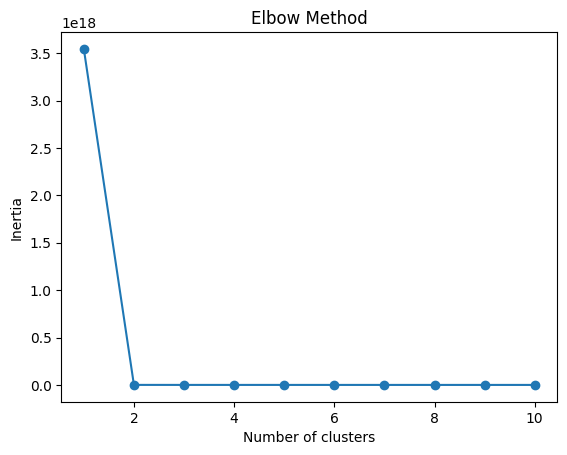

In [197]:
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    kmeans.fit(X_cluster)
    inertia.append(kmeans.inertia_)
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()    

In [198]:
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=42)
df['kmeans_cluster'] = kmeans.fit_predict(X_cluster)


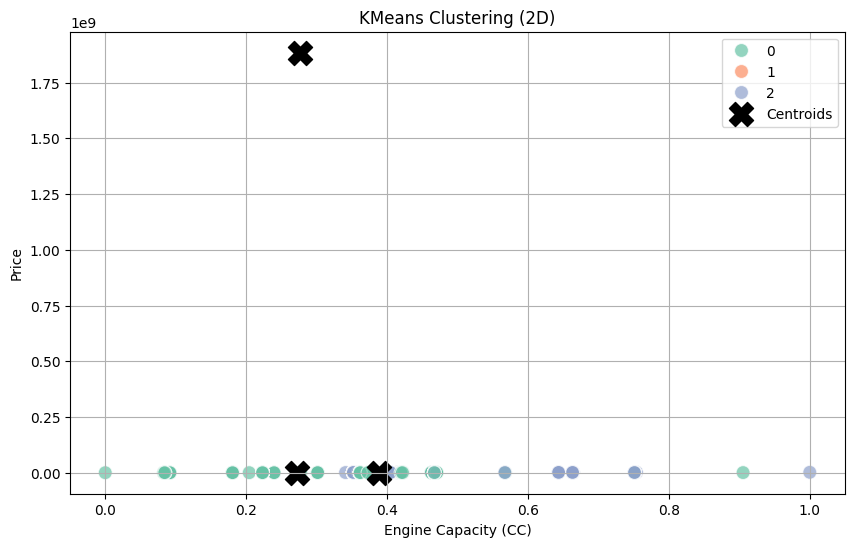

In [199]:

plt.figure(figsize=(10, 6))
sns.scatterplot(
    x='engine_capacity(CC)',
    y='price',
    hue='kmeans_cluster',
    palette='Set2',
    data=df,
    alpha=0.7,
    s=100
)


centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=300, marker='X', label='Centroids')

plt.title('KMeans Clustering (2D)')
plt.xlabel('Engine Capacity (CC)')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()


## DBSCAN ##

In [200]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_cluster)

dbscan = DBSCAN(eps=0.5, min_samples=5)
df['dbscan_cluster'] = dbscan.fit_predict(X_scaled)

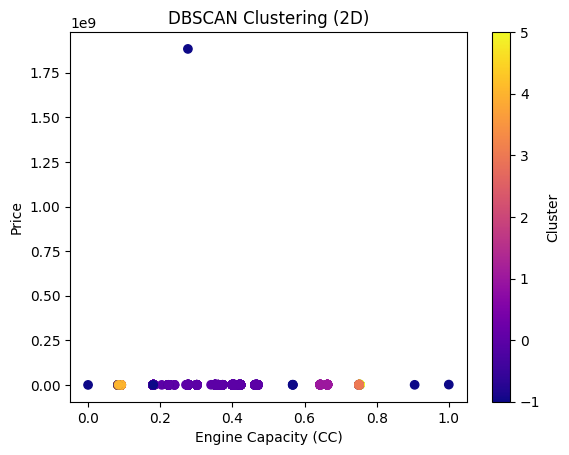

In [201]:
plt.scatter(df['engine_capacity(CC)'], df['price'], c=df['dbscan_cluster'], cmap='plasma')
plt.xlabel('Engine Capacity (CC)')
plt.ylabel('Price')
plt.title('DBSCAN Clustering (2D)')
plt.colorbar(label='Cluster')
plt.show()
